In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
# This cell is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [2]:
# importing libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import decomposition
import tsfel

In [3]:
# Adjusting the shapes
X_train_flatted = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flatted = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [4]:
# Creating DataFrames
X_train_df = pd.DataFrame(X_train_flatted)
y_train_df = pd.DataFrame(y_train, columns = ['Activity'])
Data = pd.concat([X_train_df, y_train_df], axis=1)

Question 1 :

Lets first plot the waveforms. We plot the accelerations along x, y and z axes with respect to time for all the activities.

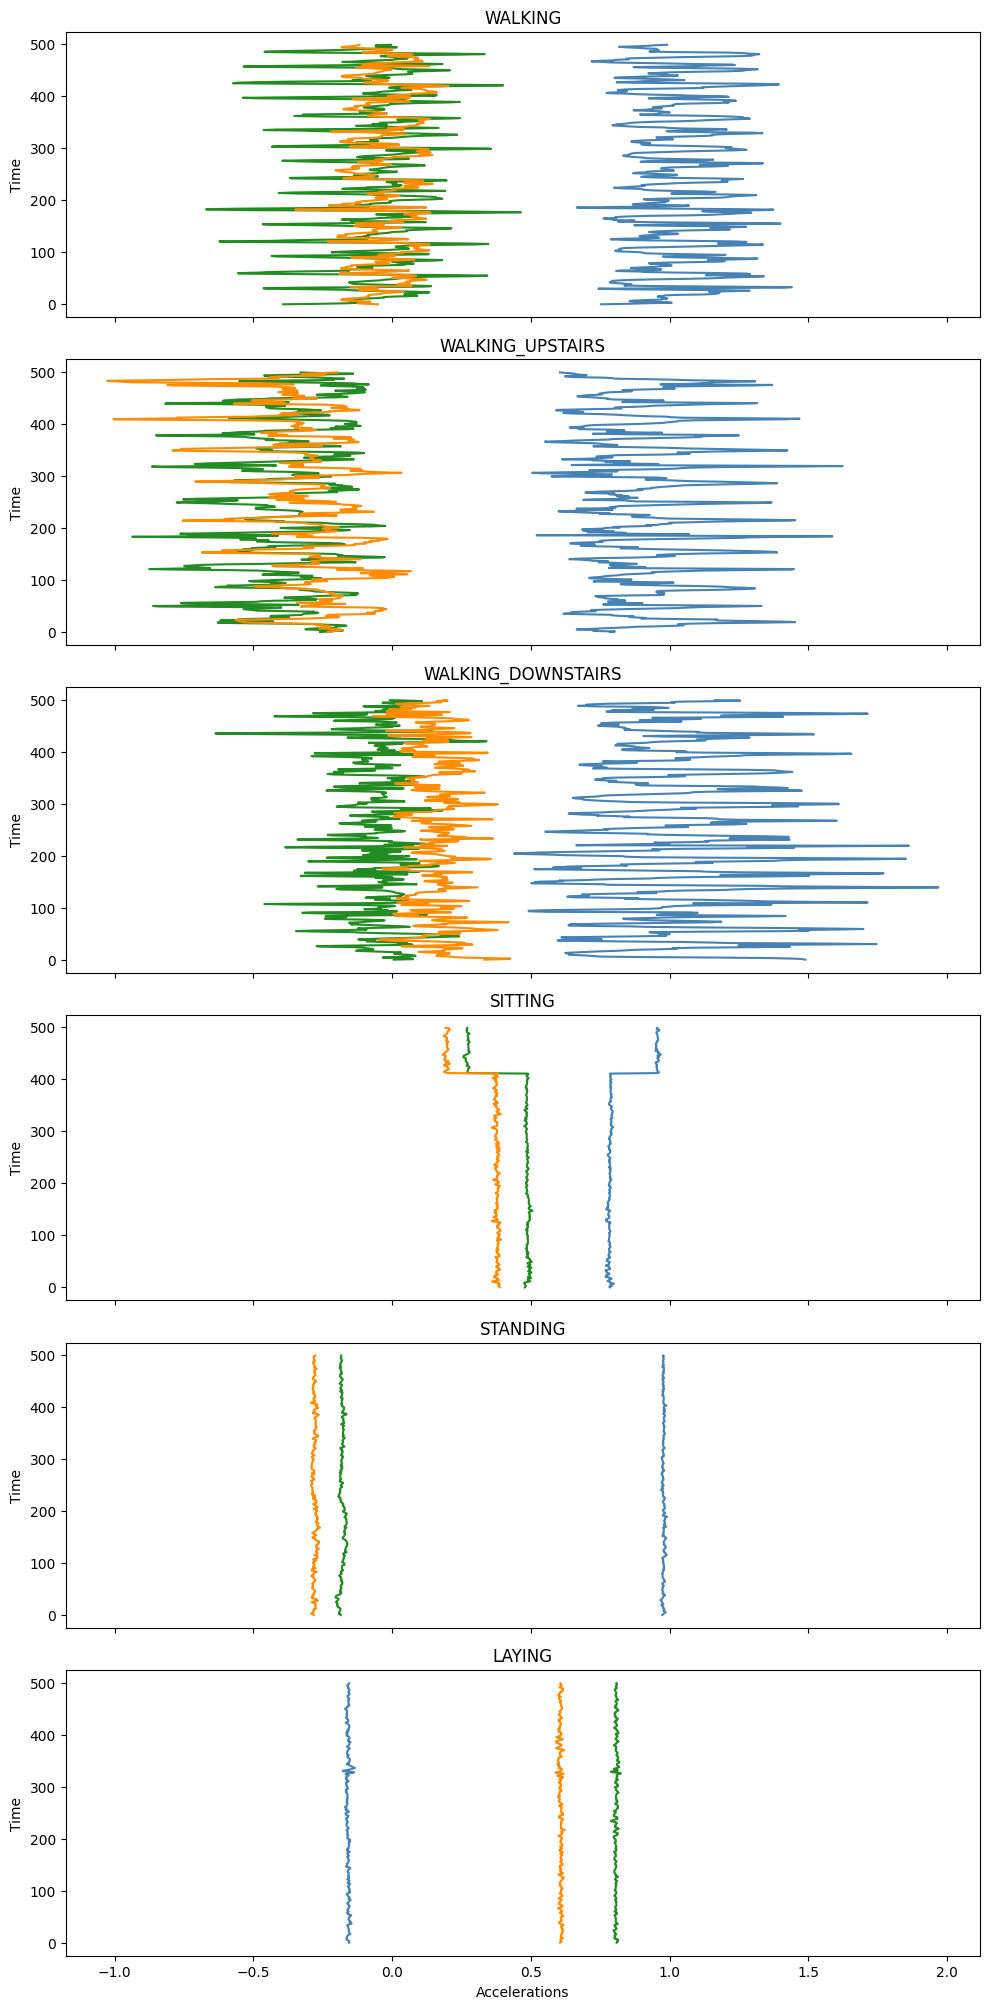

In [5]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
names = list(classes.keys())
values = list(classes.values())

def get_activity_name(i):
    return names[values.index(i)]

fig, axes = plt.subplots(6, 1, sharex=True, figsize = (10,20))
nof_participants = 1
for j in range(len(classes)):
    ind = Data.where(Data['Activity'] == j+1).dropna().index[0:nof_participants]
    axes[j].set_title(get_activity_name(j+1))
    for i in range(nof_participants):
        time = np.arange(i * len(X_train[0][:, 0]), i * len(X_train[0][:, 0]) + len(X_train[0][:, 0]))
        axes[j].plot(X_train[ind[i]][:, 0], time, c='steelblue')
        axes[j].plot(X_train[ind[i]][:, 1], time, c='forestgreen')
        axes[j].plot(X_train[ind[i]][:, 2], time, c='darkorange')
        axes[j].set_ylabel("Time")
plt.tight_layout()  
plt.xlabel("Accelerations")
plt.show()

Clearly, there is correlation between the accelartions and the activity performed by the participant. Model (we intent to use in next questions) will be able to classify the activities because of this strong correlation.

Question 2 :

In [6]:
# Creating Acceleration Data

X_train_netacc = np.empty([X_train.shape[0],X_train.shape[1]])

for i in range(X_train_netacc.shape[0]):
    for j in range(X_train_netacc.shape[1]):
        X_train_netacc[i][j] = np.sum(X_train[i][j]**2)

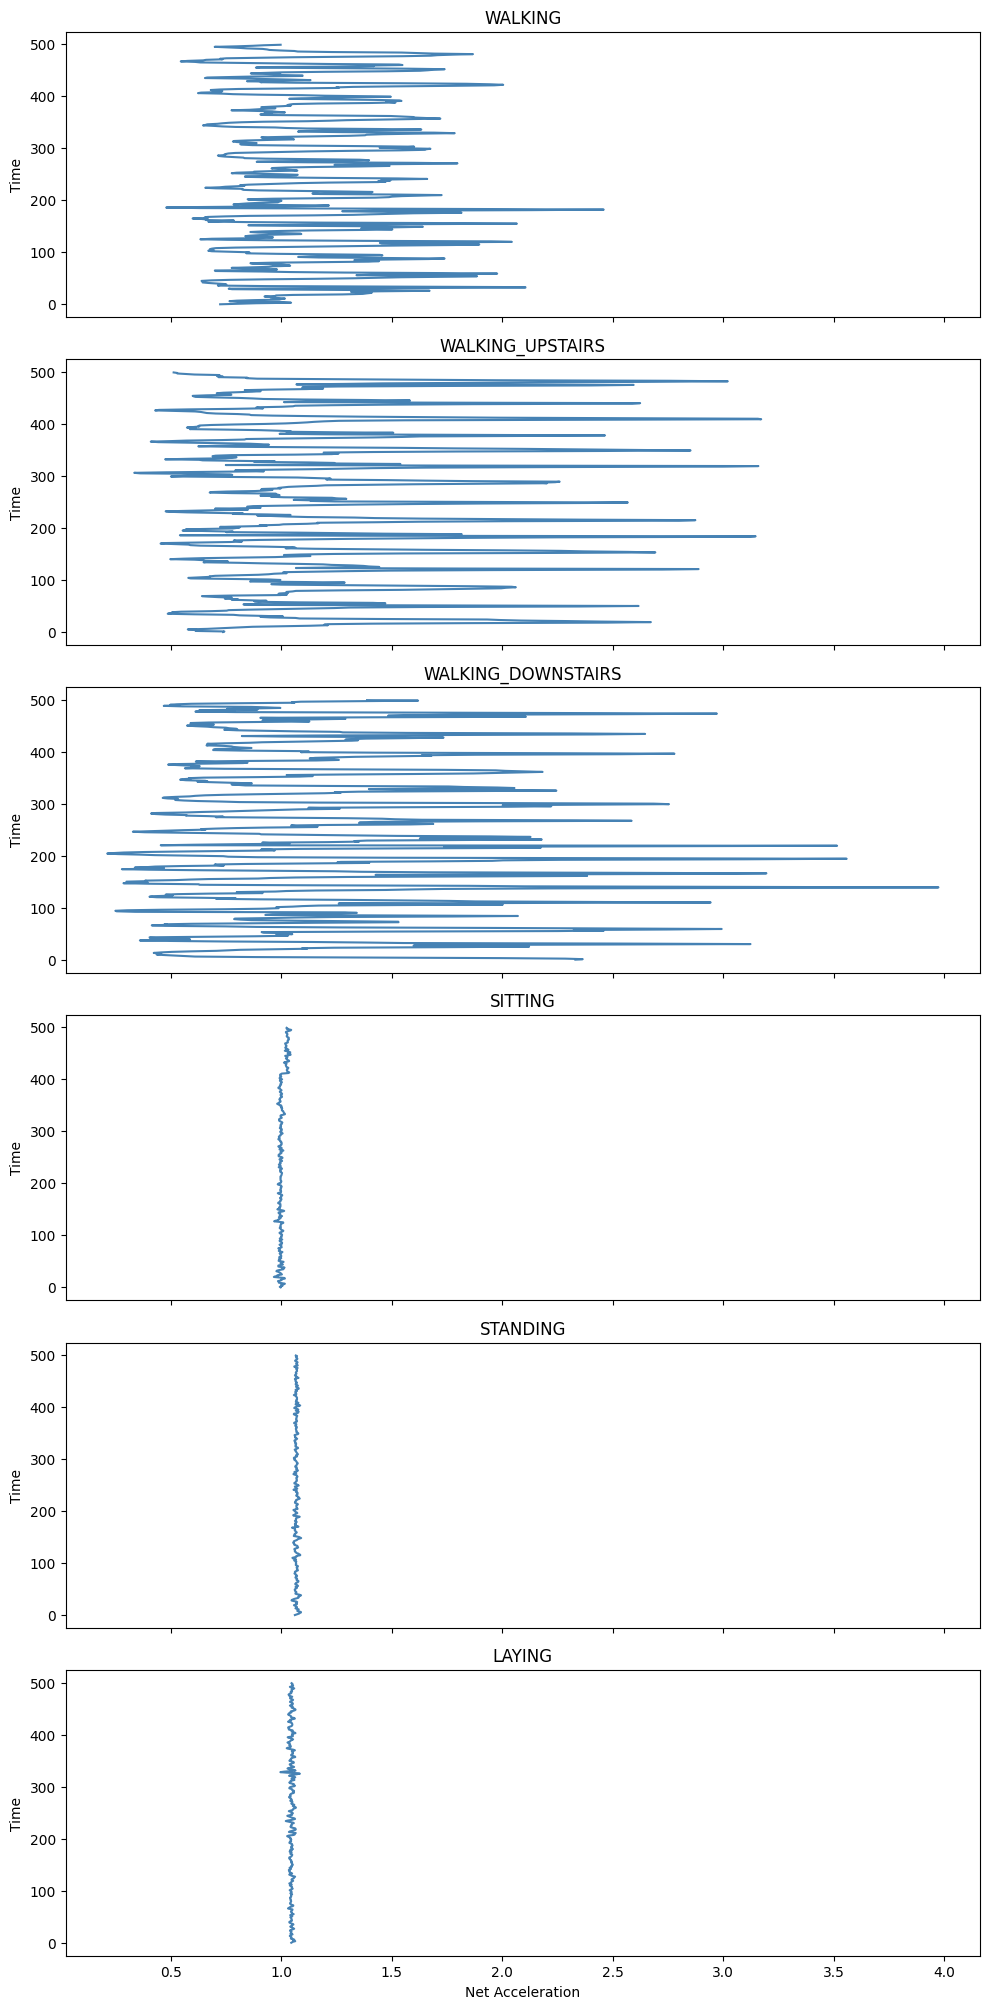

In [7]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
names = list(classes.keys())
values = list(classes.values())

def get_activity_name(i):
    return names[values.index(i)]

fig, axes = plt.subplots(6, 1, sharex=True, figsize = (10,20))
nof_participants = 1
for j in range(len(classes)):
    ind = Data.where(Data['Activity'] == j+1).dropna().index[0:nof_participants]
    axes[j].set_title(get_activity_name(j+1))
    for i in range(nof_participants):
        time = np.arange(i * len(X_train[0][:, 0]), i * len(X_train[0][:, 0]) + len(X_train[0][:, 0]))
        net_acc = X_train_netacc[ind][0]
        axes[j].plot(net_acc, time, c='steelblue')
        axes[j].set_ylabel("Time")
plt.tight_layout()  
plt.xlabel("Net Acceleration")
plt.show()

We can see that Dynamic Activities : Walking, Walking_Upstairs and Walking_Downstairs have higher net accelration than Stactic acitivities : Sitting, Standing and Laying. Along with this, the dyanamic activities have much greater variance in the acceleration values. So, We can differentiate between the two categories of activites by checking these stastical quantities only rather than using a machine learning model.

Question 3

In [8]:
model = tree.DecisionTreeClassifier()
model.fit(X_train_flatted, y_train)
y_hat = model.predict(X_test_flatted)
print("Accuracy : ",metrics.accuracy_score(y_test, y_hat))
print("\n Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_hat))

Accuracy :  0.6111111111111112

 Confusion Matrix
[[0 1 2 2 1 0]
 [0 3 2 0 1 0]
 [1 1 3 0 1 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


Question 4

In [9]:
max_depth = 10
accuracies = np.empty(max_depth)
for i in range(max_depth):
    model = tree.DecisionTreeClassifier(max_depth=i+1)
    model.fit(X_train_flatted, y_train)
    y_hat = model.predict(X_test_flatted)
    accuracies[i] = (metrics.accuracy_score(y_test, y_hat))

In [10]:
accuracies

array([0.33333333, 0.44444444, 0.61111111, 0.66666667, 0.55555556,
       0.63888889, 0.55555556, 0.61111111, 0.58333333, 0.61111111])

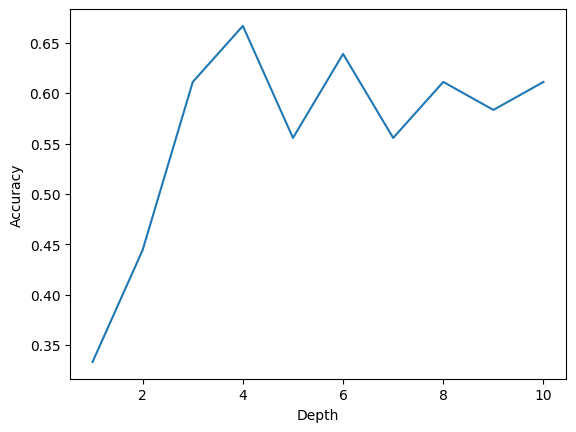

In [11]:
plt.plot(np.arange(1,11),accuracies)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

Question 5 :

In [12]:
# Applying PCA 
pca = decomposition.PCA(n_components=2)
X_train_netacc_pca = pca.fit_transform(X_train_netacc)

In [13]:
df_reduced = pd.DataFrame(data=X_train_netacc_pca, columns=['PC1', 'PC2'])
df_reduced

,PC1,PC2
0,-0.399968,-0.179389
1,-0.379367,-0.163321
2,-4.509916,1.974464
3,4.865038,-0.971136
4,-0.452700,-0.214665
...,...,...
103,9.681142,-8.444331
104,0.909598,-3.222754
105,-0.395908,-0.212976
106,-4.540347,-1.639559


In [14]:
X_train_netacc_pca_df = pd.DataFrame(X_train_netacc)
Data_pca = pd.concat([X_train_netacc_pca_df, y_train_df], axis = 1)

Data_pca

# for i in range(len(classes)):
#     X = Data_pca.where(Data_pca['Activity'] == i+1).dropna()[1]
#     Y = Data_pca.where(Data_pca['Activity'] == i+1).dropna()[2]
#     plt.scatter(X,Y, label = f"{i+1}")
# plt.legend()
# plt.title("Distribution of Activities over components from PCA")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.show()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Activity
0,1.061579,1.068788,1.076640,1.081619,1.083677,1.089191,1.088519,1.077718,1.072226,1.073787,...,1.069200,1.072072,1.072758,1.069753,1.067005,1.067372,1.070067,1.071565,1.065639,5
1,1.094193,1.105745,1.100355,1.088352,1.073085,1.064589,1.070972,1.072502,1.076323,1.085273,...,1.072441,1.074535,1.066675,1.063528,1.065388,1.066096,1.067130,1.071679,1.077976,5
2,0.737070,0.742623,0.612213,0.611427,0.618866,0.576885,0.663982,0.715187,0.761910,0.818487,...,0.735479,0.709034,0.721843,0.720080,0.607252,0.565186,0.529487,0.528832,0.512845,2
3,2.330978,2.364194,2.285008,1.995089,1.486505,0.885626,0.609474,0.559679,0.520461,0.465431,...,0.526072,0.593439,0.797267,1.059548,1.047754,1.088295,1.385482,1.619239,1.388138,3
4,1.045221,1.049030,1.053342,1.063177,1.059419,1.052925,1.058818,1.050844,1.043341,1.047368,...,1.042352,1.038869,1.047991,1.053762,1.052498,1.050367,1.048974,1.050502,1.046420,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.500916,0.606063,0.564021,0.562212,0.463815,0.469947,0.583276,0.670271,0.795946,0.760122,...,0.635296,0.753394,0.837983,1.269750,2.453684,3.150181,2.569922,2.442537,2.661125,3
104,1.667010,1.683330,1.400401,1.398746,1.443760,1.429334,1.422312,1.272041,1.266330,1.635466,...,0.625043,0.718228,0.822178,0.822011,0.734799,0.777650,0.816605,0.869754,1.036154,1
105,1.068699,1.074914,1.072772,1.067998,1.060452,1.060050,1.068315,1.065193,1.064904,1.071375,...,1.072648,1.073712,1.070341,1.070436,1.070280,1.060376,1.053773,1.053341,1.059201,5
106,2.437082,2.287970,1.472244,0.668358,0.561077,0.932713,1.170589,1.235397,1.133492,0.844032,...,1.342955,1.152644,1.066167,0.971577,0.797153,0.791073,0.748641,0.629820,0.552444,2


In [15]:
cfg_file = tsfel.get_features_by_domain()
X_train_extended = []
for i in range(len(X_train)):
    X = tsfel.time_series_features_extractor(cfg_file, X_train[i][:], fs = 50, window_size = 250)
    X_train_extended.append(np.array(X.head(1)).reshape(X.head(1).shape[1]))
X_train_extended =  np.array(X_train_extended)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


KeyboardInterrupt: 

In [ ]:
cfg_file = tsfel.get_features_by_domain()
X_test_extended = []
for i in range(len(X_test)):
    X = tsfel.time_series_features_extractor(cfg_file, X_test[i][:], fs = 50, window_size = 250)
    X_test_extended.append(np.array(X.head(1)).reshape(X.head(1).shape[1]))
X_test_extended =  np.array(X_test_extended)

In [ ]:
X_train_extended_new = np.concatenate((X_train_flatted, X_train_extended), axis = 1)
X_test_extended_new = np.concatenate((X_test_flatted, X_test_extended), axis = 1)

In [ ]:
pca = decomposition.PCA(n_components=2)
X_train_extended_new_pca = pca.fit_transform(X_train_extended_new)
X_train_extended_new_pca_df = pd.DataFrame(X_train_extended_new_pca)
Data_extended_pca = pd.concat([X_train_extended_new_pca_df, y_train_df], axis = 1)

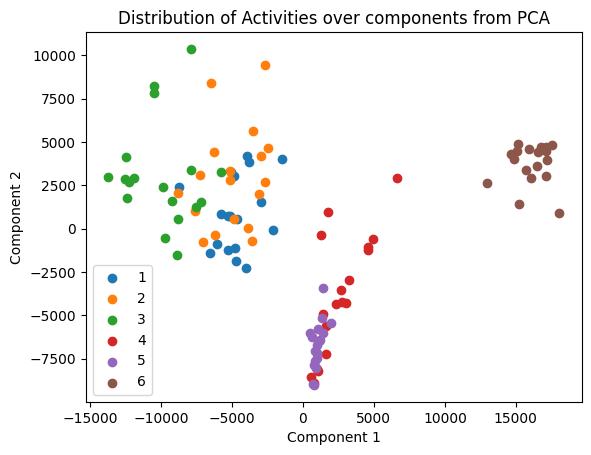

In [ ]:
# Plotting
X_train_extended_new_pca_df = pd.DataFrame(X_train_extended_new_pca)
Data_extended_pca = pd.concat([X_train_extended_new_pca_df, y_train_df], axis = 1)
for i in range(len(classes)):
    X = Data_extended_pca.where(Data_extended_pca['Activity'] == i+1).dropna()[0]
    Y = Data_extended_pca.where(Data_extended_pca['Activity'] == i+1).dropna()[1]
    plt.scatter(X,Y, label = f"{i+1}")
plt.legend()
plt.title("Distribution of Activities over components from PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Question 6

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train_extended_new, y_train)
y_hat = model.predict(X_test_extended_new)
print("Accuracy : ",metrics.accuracy_score(y_test, y_hat))
print("\n Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_hat))

Accuracy :  0.9166666666666666

 Confusion Matrix
[[6 0 0 0 0 0]
 [1 5 0 0 0 0]
 [0 1 4 0 1 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


In [ ]:
start_depth = 2
end_depth = 8
accuracies_new = np.zeros(7)
for i in range(start_depth, end_depth + 1):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train_extended_new, y_train)
    y_hat = model.predict(X_test_extended_new)
    accuracies_new[i-2] = (metrics.accuracy_score(y_test, y_hat))

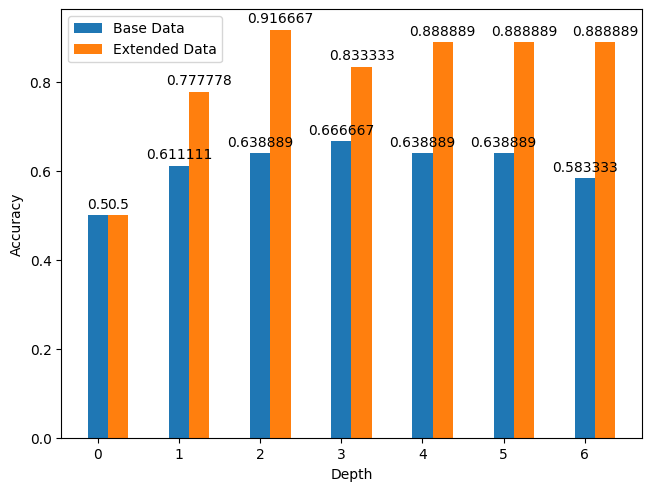

In [ ]:
depth = list(range(2,9))
accuracies_data = {
    'Given Data' : accuracies[2:9],
    'Extended Data' : accuracies_new
}

x = np.arange(len(depth))  
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Question 7 : \
As depicted, in the Confusion Matrix model misclassifies "Walking upstairs" into "Walking Downstairs" and vice-versa. The datapoints for these two activities are highly correlated with each other. This is also evident from the waveforms plotted in Question 1. Due to this, the model fails to learn decsion boundaries between these two activities and misclassifies.